In [37]:
import pandas as pd

# Load the dataset
file_path = r"C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Econometrics/Loans - Caputi.csv"
df = pd.read_csv(file_path)

# Select the five relevant variables
columns_of_interest = [
    "SeriousDlqin2yrs", 
    "RevolvingUtilizationOfUnsecuredLines", 
    "MonthlyIncome", 
    "DebtRatio", 
    "age"
]
df_subset = df[columns_of_interest]

# Initialize summary DataFrame
summary_stats = pd.DataFrame(index=columns_of_interest)

# Core stats
summary_stats["Mean"] = df_subset.mean()
summary_stats["Median"] = df_subset.median()
summary_stats["Std Dev"] = df_subset.std()
summary_stats["Min"] = df_subset.min()
summary_stats["Max"] = df_subset.max()
summary_stats["N"] = df_subset.count()
summary_stats["Skewness"] = df_subset.skew()
summary_stats["Mode"] = df_subset.mode().iloc[0]  # first mode value if multiple

# Display the result
print("Appendix 1: Descriptive Statistics")
print(summary_stats)

Appendix 1: Descriptive Statistics
                                             Mean       Median       Std Dev  \
SeriousDlqin2yrs                         0.066840     0.000000      0.249746   
RevolvingUtilizationOfUnsecuredLines     6.048438     0.154181    249.755371   
MonthlyIncome                         6670.221237  5400.000000  14384.674215   
DebtRatio                              353.005076     0.366508   2037.818523   
age                                     52.295207    52.000000     14.771866   

                                      Min        Max       N    Skewness  \
SeriousDlqin2yrs                      0.0        1.0  150000    3.468857   
RevolvingUtilizationOfUnsecuredLines  0.0    50708.0  150000   97.631574   
MonthlyIncome                         0.0  3008750.0  120269  114.040318   
DebtRatio                             0.0   329664.0  150000   95.157793   
age                                   0.0      109.0  150000    0.188995   

                           

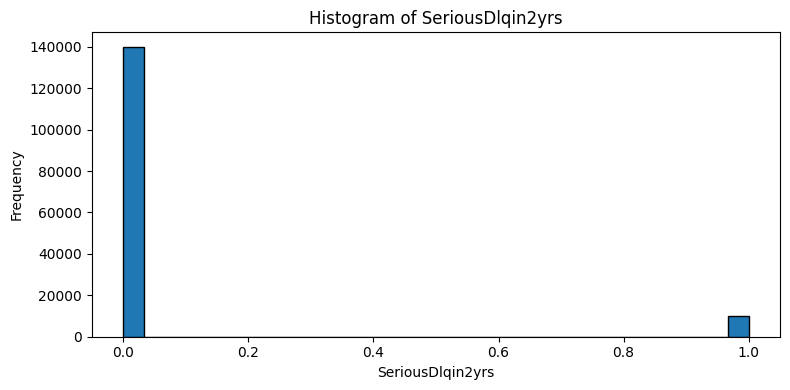

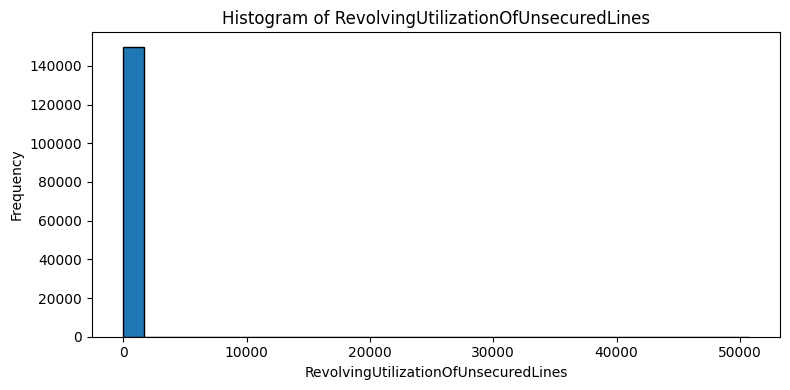

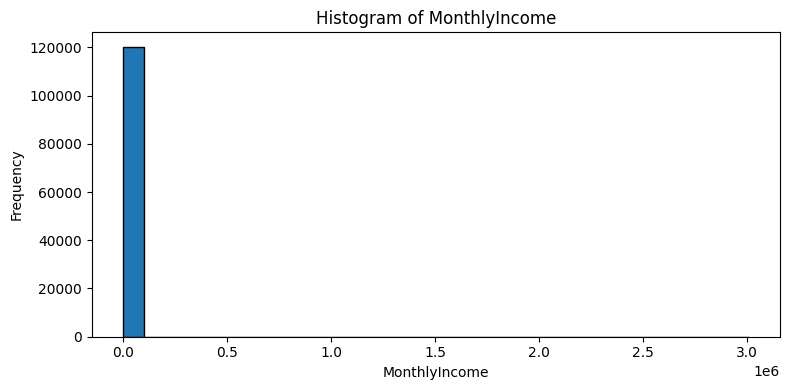

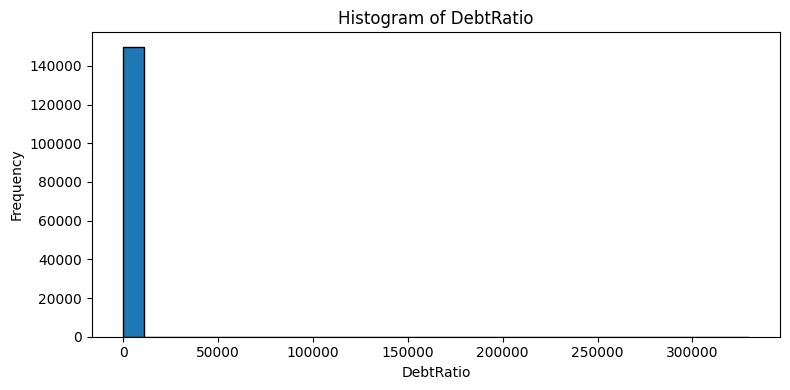

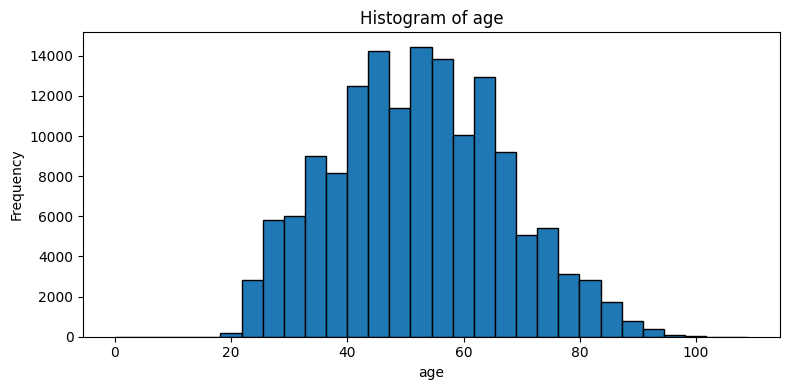

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\gianm\OneDrive\Desktop\BABSON\2nd semester\Econometrics\Loans - Caputi.csv"
df = pd.read_csv(file_path)

# Select the five relevant variables
columns_of_interest = [
    "SeriousDlqin2yrs", 
    "RevolvingUtilizationOfUnsecuredLines", 
    "MonthlyIncome", 
    "DebtRatio", 
    "age"
]
df_subset = df[columns_of_interest]

# Plot histograms for each variable
for col in columns_of_interest:
    plt.figure(figsize=(8, 4))
    df_subset[col].dropna().hist(bins=30, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


Number of outliers excluded (outside 0–1.25): 926


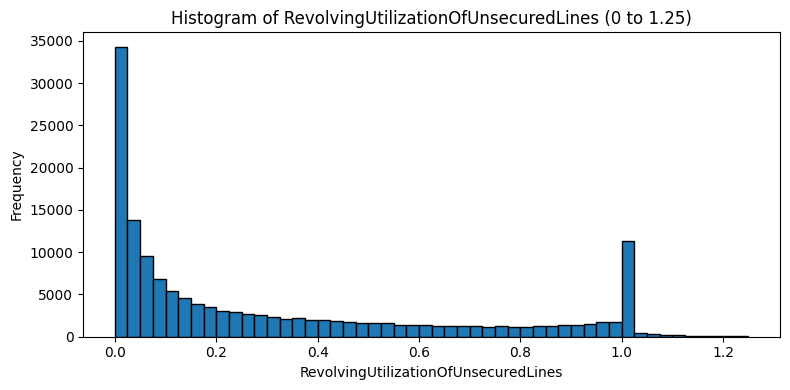

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\gianm\OneDrive\Desktop\BABSON\2nd semester\Econometrics\Loans - Caputi.csv"
df = pd.read_csv(file_path)

# Drop missing values
data = df["RevolvingUtilizationOfUnsecuredLines"].dropna()

# Filter to include only values between 0 and 1.25
filtered_data = data[(data >= 0) & (data <= 1.25)]

# Count excluded outliers
excluded_count = len(data) - len(filtered_data)
print(f"Number of outliers excluded (outside 0–1.25): {excluded_count}")

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(filtered_data, bins=50, edgecolor='black')
plt.title("Histogram of RevolvingUtilizationOfUnsecuredLines (0 to 1.25)")
plt.xlabel("RevolvingUtilizationOfUnsecuredLines")
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()

Number of outliers excluded (MonthlyIncome > 20000): 2103


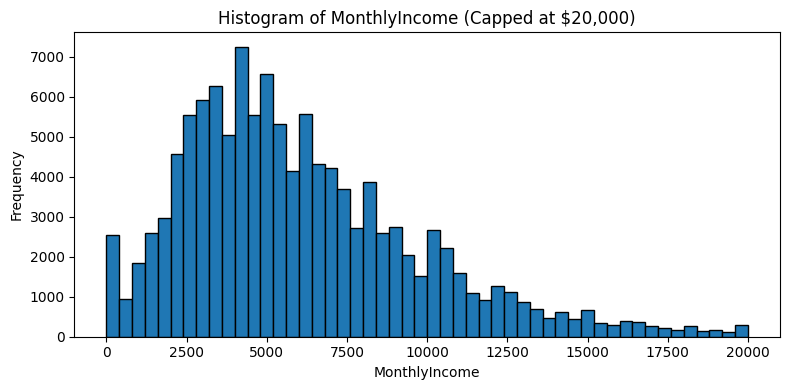

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\gianm\OneDrive\Desktop\BABSON\2nd semester\Econometrics\Loans - Caputi.csv"
df = pd.read_csv(file_path)

# Drop missing values
income_data = df["MonthlyIncome"].dropna()

# Define upper cap
cap = 20000

# Filter data to exclude outliers
filtered_income = income_data[income_data <= cap]

# Count excluded outliers
excluded_count = len(income_data) - len(filtered_income)
print(f"Number of outliers excluded (MonthlyIncome > {cap}): {excluded_count}")

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(filtered_income, bins=50, edgecolor='black')
plt.title("Histogram of MonthlyIncome (Capped at $20,000)")
plt.xlabel("MonthlyIncome")
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()


Number of outliers excluded (DebtRatio > 2): 31045


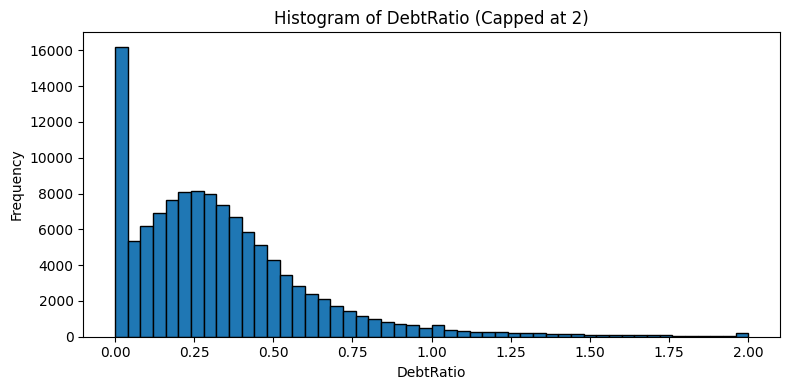

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\gianm\OneDrive\Desktop\BABSON\2nd semester\Econometrics\Loans - Caputi.csv"
df = pd.read_csv(file_path)

# Drop missing values
debt_data = df["DebtRatio"].dropna()

# Define cap
cap = 2

# Filter data
filtered_debt = debt_data[debt_data <= cap]

# Count outliers excluded
excluded_count = len(debt_data) - len(filtered_debt)
print(f"Number of outliers excluded (DebtRatio > {cap}): {excluded_count}")

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(filtered_debt, bins=50, edgecolor='black')
plt.title("Histogram of DebtRatio (Capped at 2)")
plt.xlabel("DebtRatio")
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()


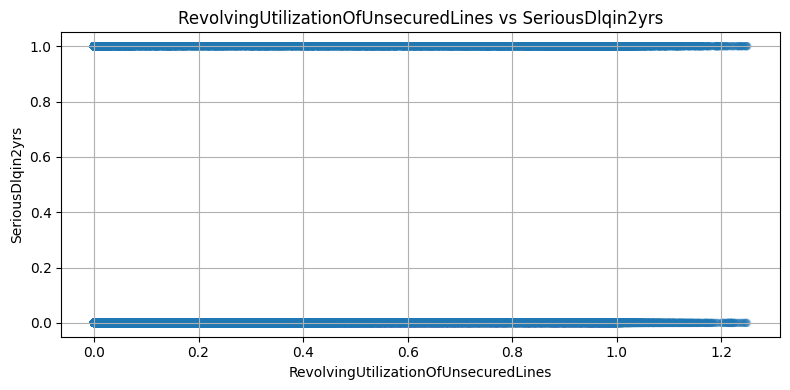

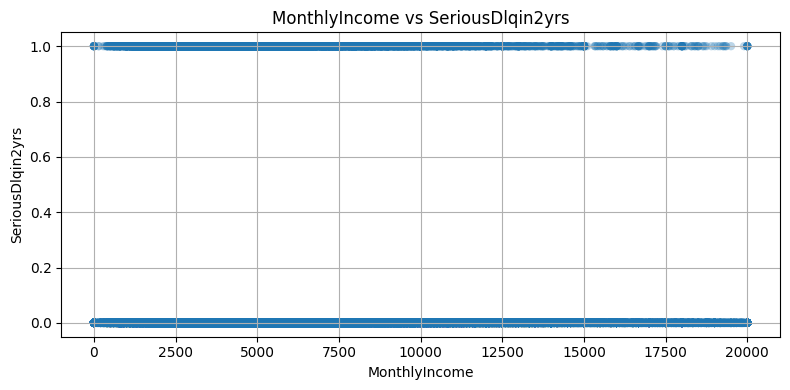

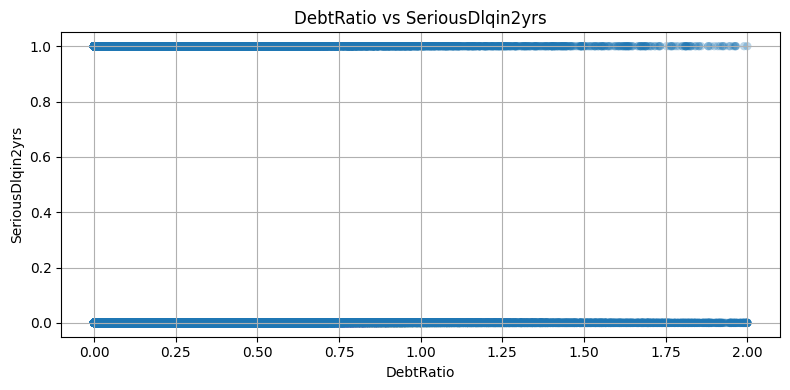

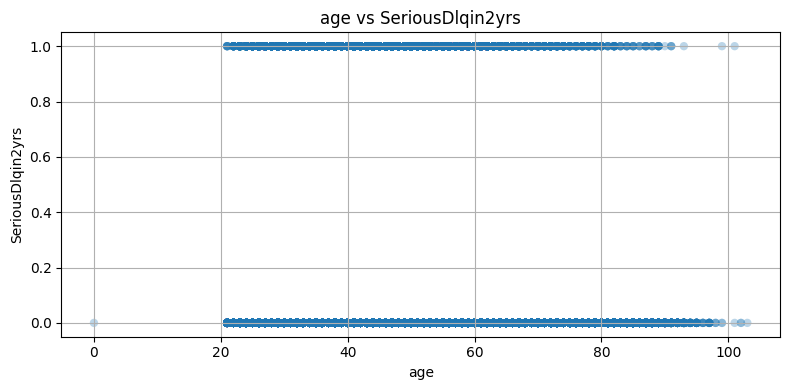

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\gianm\OneDrive\Desktop\BABSON\2nd semester\Econometrics\Loans - Caputi.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values in relevant columns
df = df[[
    "SeriousDlqin2yrs", 
    "RevolvingUtilizationOfUnsecuredLines", 
    "MonthlyIncome", 
    "DebtRatio", 
    "age"
]].dropna()

# Apply new caps
df_filtered = df[
    (df["RevolvingUtilizationOfUnsecuredLines"] <= 1.25) &
    (df["MonthlyIncome"] <= 20000) &
    (df["DebtRatio"] <= 2)
]

# Plot settings
predictors = [
    "RevolvingUtilizationOfUnsecuredLines", 
    "MonthlyIncome", 
    "DebtRatio", 
    "age"
]

for predictor in predictors:
    plt.figure(figsize=(8, 4))
    plt.scatter(df_filtered[predictor], df_filtered["SeriousDlqin2yrs"], alpha=0.3, edgecolors='none')
    plt.title(f"{predictor} vs SeriousDlqin2yrs")
    plt.xlabel(predictor)
    plt.ylabel("SeriousDlqin2yrs")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
